# Covid-19 (Coronavirus) 
## Tracker for Locations with Friends & Family

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hospitalization, ICU stats
- **Historic time series data:**
    - US State testing and hospitalization, ICU stats

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Paired")

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [3]:
jh_live_global = pd.read_csv('Datasets/JH/orig/jh_live_global_orig.csv')

In [4]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [5]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [6]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [7]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [12]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [13]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

PENDING

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [14]:
jh_live_date = jh_live_global['Last_Update'][7] # The 0th item is not updated (Diamond princess) so grab one that is updated instead.
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2020-09-26 00:00:00')

In [15]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2020-09-25 00:00:00')

In [16]:
# Date to zoom in on for charting recent data
zoom_date1 = '3/15/2020'
zoom_date2 = '4/1/2020'
zoom_date3 = '4/15/2020'
zoom_date4 = '5/1/2020'
zoom_date5 = '5/15/2020'
zoom_date6 = '6/1/2020'
zoom_date7 = '6/15/2020'
zoom_date8 = '7/1/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [17]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,32476713
Deaths,987775
Recovered,22378686
Active,9110252


In [18]:
# Top countries by confirmed count as of latest date
top_countries = jh_live_countries.nlargest(12, 'Confirmed')
top_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,7032712,203750,2727335,4101627,2020-09-26 04:23:42,37.923092,-91.345036
India,5818570,92290,4756164,970116,2020-09-26 04:23:42,23.088275,81.806127
Brazil,4689613,140537,4128490,420586,2020-09-26 04:23:42,-12.669522,-48.480493
Russia,1131088,19973,930955,180160,2020-09-26 04:23:42,54.546312,62.120860
Colombia,798317,25103,687477,85737,2020-09-26 04:23:42,5.349139,-74.190797


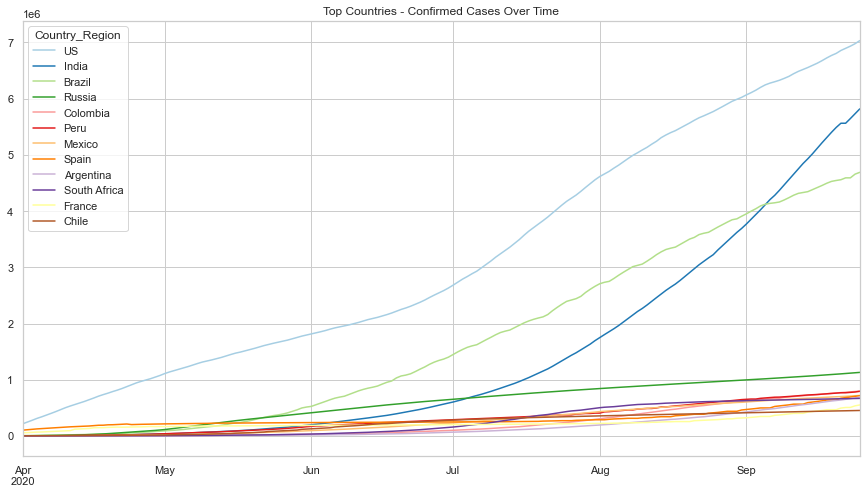

In [19]:
# Plot the top countries confirmed infections over time
jh_hist_countries_cases.loc[zoom_date2:, top_countries.index].plot(figsize=(15,8), title="Top Countries - Confirmed Cases Over Time")

### US State Level

In [20]:
# Top US States by confirmed cases
top_states = jh_live_usstates.nlargest(12, 'Confirmed')
top_states

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
California,803660,15516,0,788144,2020-09-26 04:23:42,37.843962,-120.728594
Texas,751068,15610,0,735458,2020-09-26 04:23:42,31.660643,-98.653069
Florida,695887,13915,0,681972,2020-09-26 04:23:42,28.940755,-82.700744
New York,453755,33122,0,420633,2020-09-26 04:23:42,42.544151,-75.474183
Georgia,312514,6874,0,305640,2020-09-26 04:23:42,32.808532,-83.577430
Illinois,286332,8807,0,277525,2020-09-26 04:23:42,39.843618,-89.178330
Arizona,216367,5587,0,210780,2020-09-26 04:23:42,33.675904,-111.463232
North Carolina,204330,3409,0,200921,2020-09-26 04:23:42,35.624210,-79.501099
New Jersey,202100,16097,0,186003,2020-09-26 04:23:42,40.286441,-74.622450


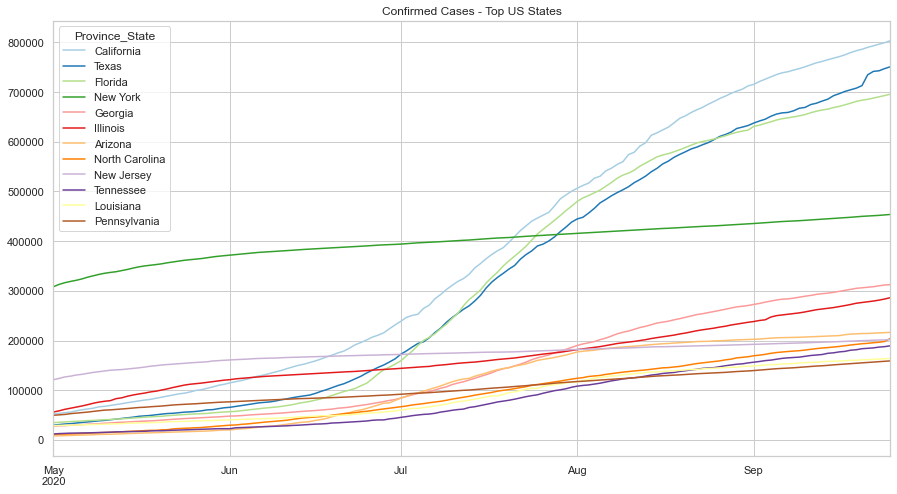

In [21]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date4:, top_states.index].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

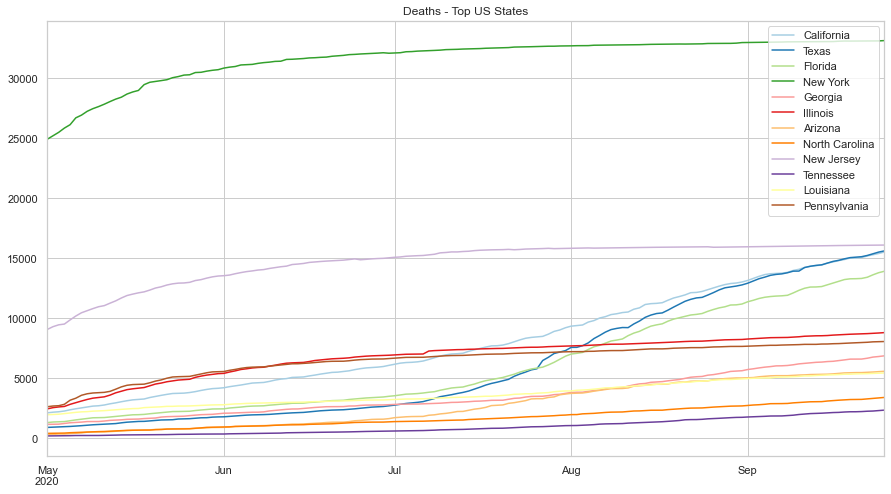

In [22]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_states.index].loc[zoom_date4:, :].plot(title='Deaths - Top US States', figsize=(15,8))

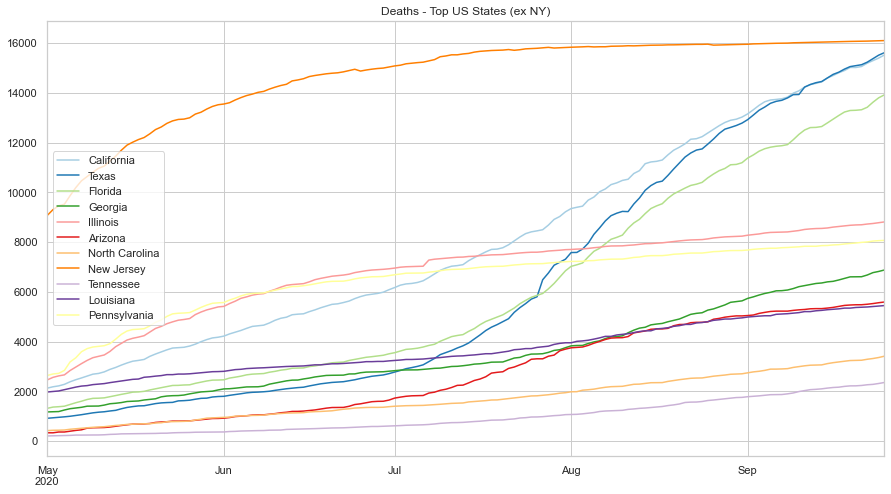

In [23]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_states.index].loc[zoom_date4:, top_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))

### US County Level

In [24]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(12, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Middlesex,27103,2139,0,24964,2020-09-26 04:23:42,42.486077,-71.390492,25017.0
Suffolk,24089,1133,0,22956,2020-09-26 04:23:42,42.327951,-71.078504,25025.0
Essex,19525,1275,0,18250,2020-09-26 04:23:42,42.668763,-70.946872,25009.0
Worcester,14252,1097,0,13155,2020-09-26 04:23:42,42.350270,-71.904934,25027.0
Norfolk,10170,1054,0,9116,2020-09-26 04:23:42,42.160731,-71.205304,25021.0


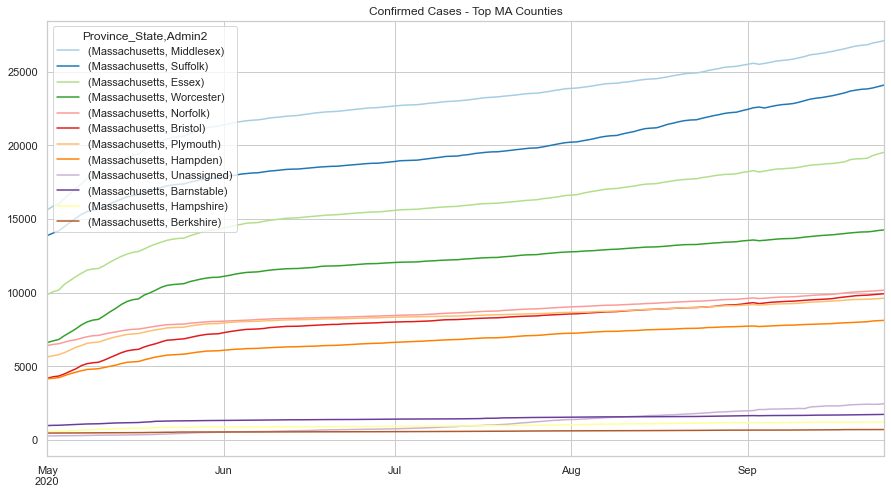

In [25]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(12).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date4:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

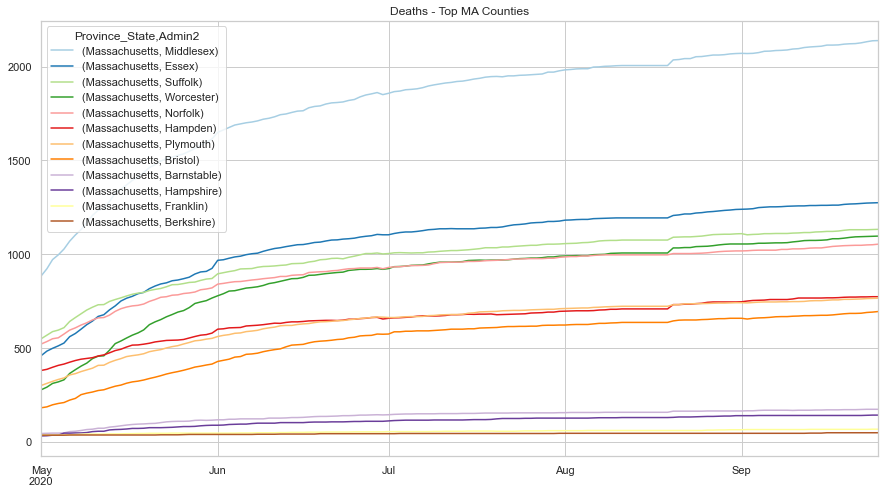

In [26]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(12).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date4:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [27]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(12, 'Confirmed')
top_counties_CA.head(5)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,265775,6488,0,259287,2020-09-26 04:23:42,34.308284,-118.228241,6037.0
Riverside,58178,1189,0,56989,2020-09-26 04:23:42,33.743150,-115.993358,6065.0
San Bernardino,53669,922,0,52747,2020-09-26 04:23:42,34.840603,-116.177469,6071.0
Orange,52904,1204,0,51700,2020-09-26 04:23:42,33.701475,-117.764600,6059.0
San Diego,46001,775,0,45226,2020-09-26 04:23:42,33.034846,-116.736533,6073.0


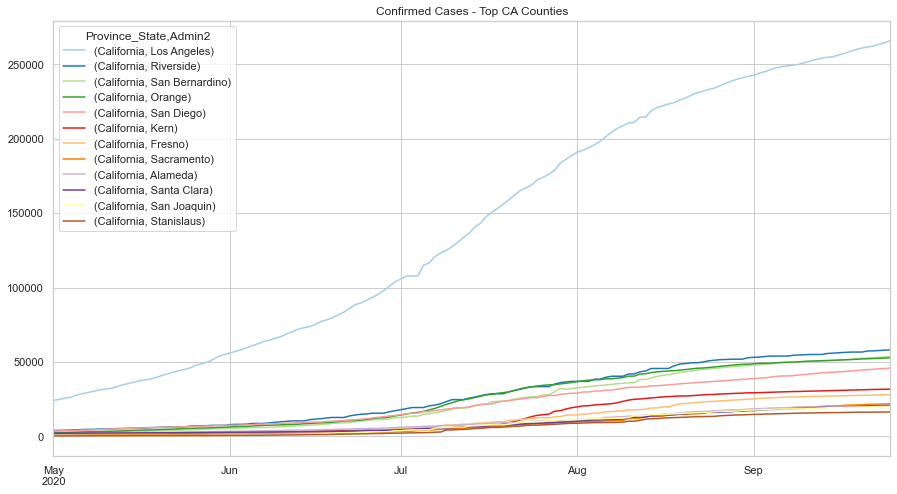

In [28]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(12).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date4:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

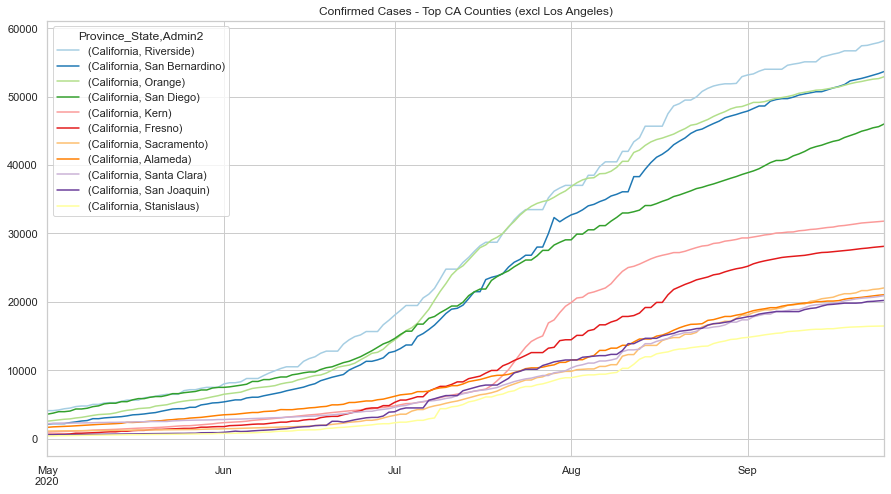

In [29]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

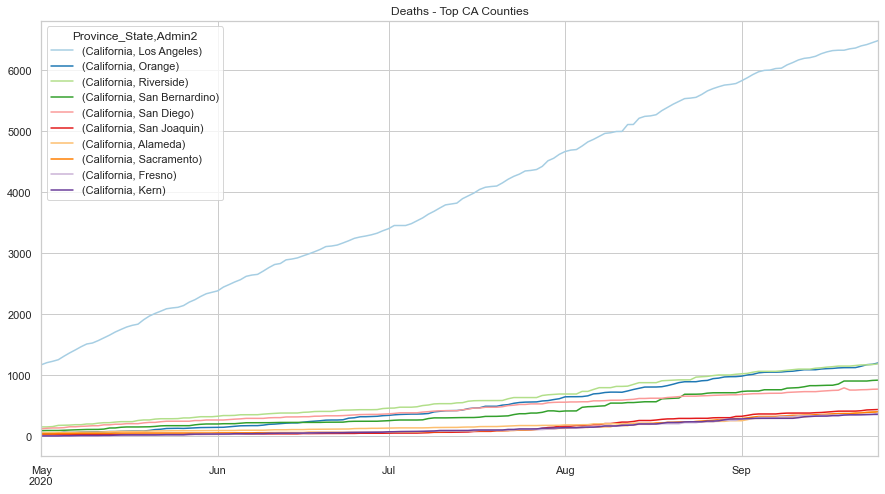

In [30]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(10).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date4:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

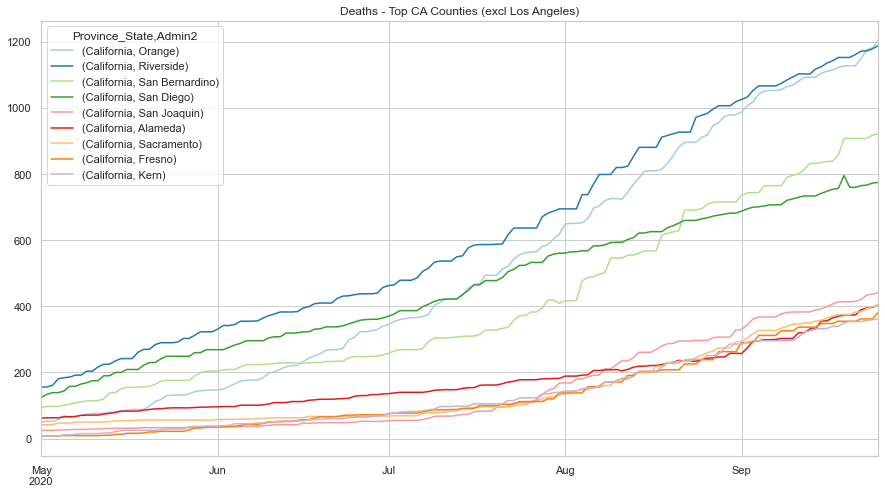

In [31]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### US Counties - Friends & Family

In [32]:
fnf_counties = [('California', 'Orange'), ('Massachusetts', 'Middlesex'), ('Massachusetts', 'Suffolk'), 
                ('Massachusetts', 'Essex'), ('Massachusetts', 'Bristol')]

#### Live stats for locations where friends and family live

In [33]:
# Add live stats from US Counties of friends & family
fnf_live = jh_live_uscounties.loc[fnf_counties, :]
fnf_live = fnf_live.drop('FIPS', axis=1)

In [34]:
# Add live stats from Costa Rica from the Countries dataset
fnf_cr = jh_live_countries.loc[['Costa Rica']]

In [35]:
# Merge Costa Rica data with US County data
fnf_live.loc[('Costa Rica')] = fnf_cr.loc[('Costa Rica')]

In [36]:
# Display all live data
fnf_live

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
"(California, Orange)",52904,1204,0,51700,2020-09-26 04:23:42,33.701475,-117.764600
"(Massachusetts, Middlesex)",27103,2139,0,24964,2020-09-26 04:23:42,42.486077,-71.390492
"(Massachusetts, Suffolk)",24089,1133,0,22956,2020-09-26 04:23:42,42.327951,-71.078504
"(Massachusetts, Essex)",19525,1275,0,18250,2020-09-26 04:23:42,42.668763,-70.946872
"(Massachusetts, Bristol)",9926,695,0,9231,2020-09-26 04:23:42,41.792284,-71.108722
Costa Rica,70816,812,27023,42981,2020-09-26 04:23:42,9.748900,-83.753400


#### Confirmed cases over time in locations where friends and family live

In [37]:
# Add confirmed cases from US Counties of friends & family
fnf_hist_cases = jh_hist_uscounties_cases.loc[:, fnf_counties ]

In [38]:
# Add confirmed cases in Costa Rica from the Countries dataset
fnf_hist_cases[('Costa Rica', '')] = jh_hist_countries_cases['Costa Rica']

In [39]:
# Check the most recent 8 days (week + start)
fnf_hist_cases.tail(8)

Province_State California Massachusetts                        Costa Rica
Admin2             Orange     Middlesex Suffolk  Essex Bristol           
2020-09-18          51646         26545   23552  18872    9700      62374
2020-09-19          51873         26644   23674  19022    9746      63712
2020-09-20          52063         26732   23741  19074    9788      63712
2020-09-21          52201         26784   23798  19086    9811      65602
2020-09-22          52382         26820   23822  19120    9826      66689
2020-09-23          52538         26943   23891  19305    9858      68059
2020-09-24          52622         27014   23988  19422    9895      69459
2020-09-25          52904         27103   24089  19525    9926      70816

In [40]:
# Sort in descending order
fnf_hist_cases.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

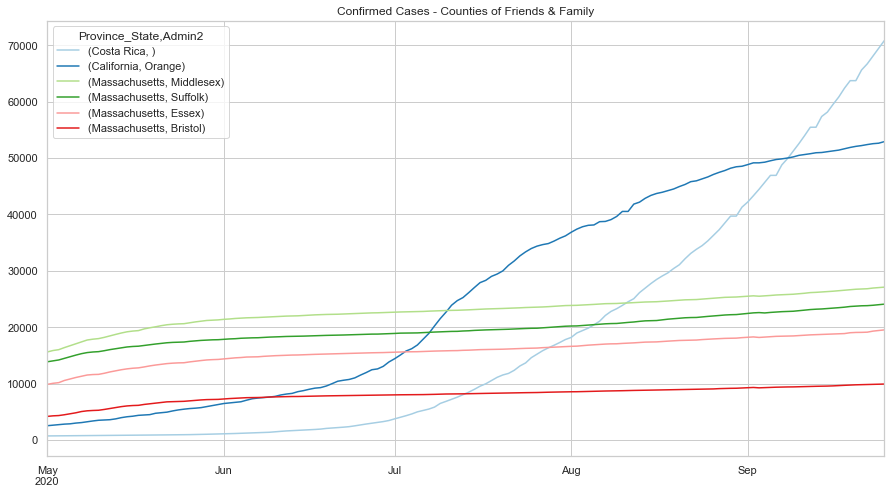

In [41]:
# Plot the data in a chart
fnf_hist_cases.loc[zoom_date4:,:].plot(title='Confirmed Cases - Counties of Friends & Family', figsize=(15,8))

#### Deaths over time in locations where friends and family live

In [42]:
# Add deaths from US Counties of friends & family
fnf_hist_deaths = jh_hist_uscounties_deaths.loc[:, fnf_counties ]

In [43]:
# Add MA "Unassigned" since there are days where deaths are flat on the County level while they are unassigned
fnf_hist_deaths[('Massachusetts', 'Unassigned')] = jh_hist_uscounties_deaths.loc[:, ('Massachusetts', 'Unassigned') ]

In [44]:
# Add deaths in Costa Rica from the Countries dataset
fnf_hist_deaths[('Costa Rica', '')] = jh_hist_countries_deaths['Costa Rica']

In [45]:
# Check the most recent 8 days (week + start)
fnf_hist_deaths.tail(8)

Province_State California Massachusetts                                   \
Admin2             Orange     Middlesex Suffolk Essex Bristol Unassigned   
2020-09-18           1123          2116    1124  1262     680          5   
2020-09-19           1127          2120    1128  1266     683          5   
2020-09-20           1128          2122    1131  1268     685          5   
2020-09-21           1128          2123    1131  1269     685          5   
2020-09-22           1150          2127    1131  1271     686          5   
2020-09-23           1176          2133    1131  1273     690          5   
2020-09-24           1182          2138    1132  1274     692          5   
2020-09-25           1204          2139    1133  1275     695          5   

Province_State Costa Rica  
Admin2                     
2020-09-18            686  
2020-09-19            706  
2020-09-20            706  
2020-09-21            745  
2020-09-22            760  
2020-09-23            781  
2020-09-24            795  
2020-09-25            812

In [46]:
# Sort in descending order
fnf_hist_deaths.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

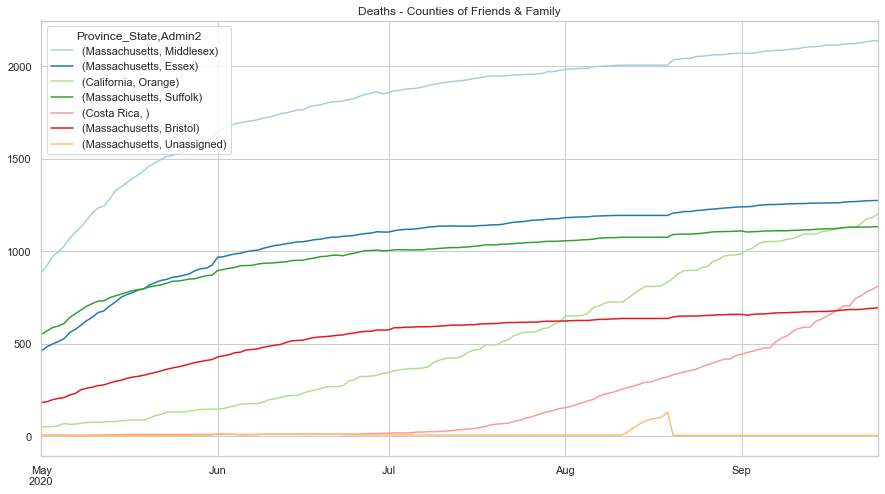

In [47]:
# Plot the data in a chart
fnf_hist_deaths.loc[zoom_date4:,:].plot(title='Deaths - Counties of Friends & Family', figsize=(15,8))